<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Google-Colaboratory-en-Ciencias-Economicas/blob/master/Analisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos

## Carga de librerias
Se utilizan las librerias: pandas para cálculos con dataframe, datareader para obtener datos de fuente externa, datetime para trabajar con las fechas, matplotlib para los primeros gráficos y numpy para cálculos matemáticos más avanzados.

In [1]:
import pandas as pd
import pandas_datareader as data
import datetime as dt
import matplotlib.pyplot as plot
import numpy as np

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Obtencion de los datos por ejercicios 
Se crean conjuntos de datos denominados BTC por Bitcoin para cada uno de los ejercicios, obteniendo los datos desde yahoo finanzas. En este caso se decide trabajar por año para el mismo activo digital, pero podría haber sido tambien comparar diferentes criptodivisas, ya que de la visualización de las gráficas se puede constatar que presentan el mismo comportamiento.

In [0]:
BTC2017 = data.DataReader("BTC-USD", start='2017-01-01', end='2017-12-31', data_source='yahoo')
BTC2018 = data.DataReader("BTC-USD", start='2018-01-01', end='2018-12-31', data_source='yahoo')
BTC2019 = data.DataReader("BTC-USD", start='2019-01-01', end='2019-12-31', data_source='yahoo')

## Creando dataframe y realizando limpieza y transformacion de los datos

### Dataframe por cada uno de los años

In [0]:
BITCOIN2017 = pd.DataFrame(BTC2017)
BITCOIN2018 = pd.DataFrame(BTC2018)
BITCOIN2019 = pd.DataFrame(BTC2019)

Se consulta la cantidad de filas y columnas por cada dataset correspondiente a cada año

In [4]:
BITCOIN2017.shape

(366, 6)

In [5]:
BITCOIN2018.shape

(366, 6)

In [6]:
BITCOIN2019.shape

(366, 6)

Ahora vamos a visualizar uno de los datasets creados, el correspondiente al ejercicio 2019, en el cual ya se sabe por el comando shape que contiene 366 filas y 6 columnas.

In [7]:
print(BITCOIN2019)

                   High          Low  ...       Volume    Adj Close
Date                                  ...                          
2019-01-01  3850.913818  3707.231201  ...   4324200990  3843.520020
2019-01-02  3947.981201  3817.409424  ...   5244856835  3943.409424
2019-01-03  3935.685059  3826.222900  ...   4530215218  3836.741211
2019-01-04  3865.934570  3783.853760  ...   4847965467  3857.717529
2019-01-05  3904.903076  3836.900146  ...   5137609823  3845.194580
...                 ...          ...  ...          ...          ...
2019-12-28  7399.041016  7286.905273  ...  21365673026  7317.990234
2019-12-29  7513.948242  7279.865234  ...  22445257701  7422.652832
2019-12-30  7454.824219  7276.308105  ...  22874131671  7292.995117
2019-12-31  7335.290039  7169.777832  ...  21167946112  7193.599121
2020-01-01  7254.330566  7174.944336  ...  18565664996  7200.174316

[366 rows x 6 columns]


Se puede observar que los nombres de las distintas filas fueron consignados con la fecha de cada uno de los registros de cotización del Bitcoin, se procede a continuación a crear la columna Date, renombrar los nombres de las filas, y crear la variable Day con el nombre del día tomando ese dato desde la columna Date.

### Transformando datos del dataset

In [0]:
DATE2017 = BITCOIN2017.index.values
DATE2018 = BITCOIN2018.index.values
DATE2019 = BITCOIN2019.index.values

De esta forma se genera la variable "Date" por cada año, tomando el valor del index (nombre de las filas) para luego volcar esos valores a una nueva columna

In [0]:
BITCOIN2017.insert(0, column='Date', value=DATE2017)
BITCOIN2018.insert(0, column='Date', value=DATE2018)
BITCOIN2019.insert(0, column='Date', value=DATE2019)

Con el codigo se agrega la columna Date en primera posición tomando los valores de las variables creadas anteriormente, para cada dataset de cada año analizado. A continuación visualizamos el dataset del año 2019 para ver como esta quedando.

In [10]:
print(BITCOIN2019)

                 Date         High  ...       Volume    Adj Close
Date                                ...                          
2019-01-01 2019-01-01  3850.913818  ...   4324200990  3843.520020
2019-01-02 2019-01-02  3947.981201  ...   5244856835  3943.409424
2019-01-03 2019-01-03  3935.685059  ...   4530215218  3836.741211
2019-01-04 2019-01-04  3865.934570  ...   4847965467  3857.717529
2019-01-05 2019-01-05  3904.903076  ...   5137609823  3845.194580
...               ...          ...  ...          ...          ...
2019-12-28 2019-12-28  7399.041016  ...  21365673026  7317.990234
2019-12-29 2019-12-29  7513.948242  ...  22445257701  7422.652832
2019-12-30 2019-12-30  7454.824219  ...  22874131671  7292.995117
2019-12-31 2019-12-31  7335.290039  ...  21167946112  7193.599121
2020-01-01 2020-01-01  7254.330566  ...  18565664996  7200.174316

[366 rows x 7 columns]


Ahora tenemos siete columnas, porque se agregó la columna Date, pero se debe cambiar el nombre a las filas, lo que se hace de la siguiente forma:

In [0]:
BITCOIN2017.reset_index(drop=True, inplace=True)
BITCOIN2018.reset_index(drop=True, inplace=True)
BITCOIN2019.reset_index(drop=True, inplace=True)

Y el dataframe presenta ahora el siguiente aspecto:

In [12]:
print(BITCOIN2019)

          Date         High          Low  ...        Close       Volume    Adj Close
0   2019-01-01  3850.913818  3707.231201  ...  3843.520020   4324200990  3843.520020
1   2019-01-02  3947.981201  3817.409424  ...  3943.409424   5244856835  3943.409424
2   2019-01-03  3935.685059  3826.222900  ...  3836.741211   4530215218  3836.741211
3   2019-01-04  3865.934570  3783.853760  ...  3857.717529   4847965467  3857.717529
4   2019-01-05  3904.903076  3836.900146  ...  3845.194580   5137609823  3845.194580
..         ...          ...          ...  ...          ...          ...          ...
361 2019-12-28  7399.041016  7286.905273  ...  7317.990234  21365673026  7317.990234
362 2019-12-29  7513.948242  7279.865234  ...  7422.652832  22445257701  7422.652832
363 2019-12-30  7454.824219  7276.308105  ...  7292.995117  22874131671  7292.995117
364 2019-12-31  7335.290039  7169.777832  ...  7193.599121  21167946112  7193.599121
365 2020-01-01  7254.330566  7174.944336  ...  7200.174316  18565

### Creando datos para los diferentes datasets

In [0]:
BITCOIN2017['Day']=pd.DatetimeIndex(BITCOIN2017['Date']).day_name()
BITCOIN2018['Day']=pd.DatetimeIndex(BITCOIN2018['Date']).day_name()
BITCOIN2019['Day']=pd.DatetimeIndex(BITCOIN2019['Date']).day_name()

In [14]:
print(BITCOIN2019)

          Date         High          Low  ...       Volume    Adj Close        Day
0   2019-01-01  3850.913818  3707.231201  ...   4324200990  3843.520020    Tuesday
1   2019-01-02  3947.981201  3817.409424  ...   5244856835  3943.409424  Wednesday
2   2019-01-03  3935.685059  3826.222900  ...   4530215218  3836.741211   Thursday
3   2019-01-04  3865.934570  3783.853760  ...   4847965467  3857.717529     Friday
4   2019-01-05  3904.903076  3836.900146  ...   5137609823  3845.194580   Saturday
..         ...          ...          ...  ...          ...          ...        ...
361 2019-12-28  7399.041016  7286.905273  ...  21365673026  7317.990234   Saturday
362 2019-12-29  7513.948242  7279.865234  ...  22445257701  7422.652832     Sunday
363 2019-12-30  7454.824219  7276.308105  ...  22874131671  7292.995117     Monday
364 2019-12-31  7335.290039  7169.777832  ...  21167946112  7193.599121    Tuesday
365 2020-01-01  7254.330566  7174.944336  ...  18565664996  7200.174316  Wednesday

[36

Ahora tenemos 8 columnas en cada uno de los datasets porque tenemos la columna Day con el nombre del día correspondiente a la fecha de cotización registrada del Bitcoin.

### Cambiando el nombre de una columna de cada uno de los Datasets
Ese cambio es necesario, porque algunos parámetros de algoritmos que se utilizarán no aceptan nonmbres de columnas de dos palabras, por eso se utiliza un guión bajo.

In [0]:
BITCOIN2017.rename(columns={'Adj Close':'Adj_Close_2017'}, inplace=True)
BITCOIN2018.rename(columns={'Adj Close':'Adj_Close_2018'}, inplace=True)
BITCOIN2019.rename(columns={'Adj Close':'Adj_Close_2019'}, inplace=True)

In [16]:
print(BITCOIN2019)

          Date         High  ...  Adj_Close_2019        Day
0   2019-01-01  3850.913818  ...     3843.520020    Tuesday
1   2019-01-02  3947.981201  ...     3943.409424  Wednesday
2   2019-01-03  3935.685059  ...     3836.741211   Thursday
3   2019-01-04  3865.934570  ...     3857.717529     Friday
4   2019-01-05  3904.903076  ...     3845.194580   Saturday
..         ...          ...  ...             ...        ...
361 2019-12-28  7399.041016  ...     7317.990234   Saturday
362 2019-12-29  7513.948242  ...     7422.652832     Sunday
363 2019-12-30  7454.824219  ...     7292.995117     Monday
364 2019-12-31  7335.290039  ...     7193.599121    Tuesday
365 2020-01-01  7254.330566  ...     7200.174316  Wednesday

[366 rows x 8 columns]


### Creando la columna Returns
Se crea una columna nueva por cada datasets, con los retorno de los precios, definiendo esos retornos como el precio del dia n, menos el precio del dia n-1 tal como se visualiza en la siguiente ecuación:


In [0]:
BITCOIN2017['Return_2017']=BITCOIN2017.Adj_Close_2017.pct_change()
BITCOIN2018['Return_2018']=BITCOIN2018.Adj_Close_2018.pct_change()
BITCOIN2019['Return_2019']=BITCOIN2019.Adj_Close_2019.pct_change()

In [18]:
print(BITCOIN2019)

          Date         High  ...        Day  Return_2019
0   2019-01-01  3850.913818  ...    Tuesday          NaN
1   2019-01-02  3947.981201  ...  Wednesday     0.025989
2   2019-01-03  3935.685059  ...   Thursday    -0.027050
3   2019-01-04  3865.934570  ...     Friday     0.005467
4   2019-01-05  3904.903076  ...   Saturday    -0.003246
..         ...          ...  ...        ...          ...
361 2019-12-28  7399.041016  ...   Saturday     0.003827
362 2019-12-29  7513.948242  ...     Sunday     0.014302
363 2019-12-30  7454.824219  ...     Monday    -0.017468
364 2019-12-31  7335.290039  ...    Tuesday    -0.013629
365 2020-01-01  7254.330566  ...  Wednesday     0.000914

[366 rows x 9 columns]


Ahora tenemos 9 columnas, la que se agrega es el calculo del retorno, por su forma de calcular se puede observar que para el dia inicial del dataset, posición 0, no hay un valor disponible porque no tiene el valor correspondiente al dia n-1.

## Cálculos de estadística descriptiva

In [0]:
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [20]:
BITCOIN2017.head()

,Date,High,Low,Open,Close,Volume,Adj_Close_2017,Day,Return_2017
0,2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012,Sunday,NaN
1,2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000,Monday,0.023464
2,2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966,Tuesday,0.021620
3,2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980,Wednesday,0.106233
4,2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005,Thursday,-0.122410


In [21]:
BITCOIN2018.head()

,Date,High,Low,Open,Close,Volume,Adj_Close_2018,Day,Return_2018
0,2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,10291200000,13657.200195,Monday,NaN
1,2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,16846600192,14982.099609,Tuesday,0.097011
2,2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,16871900160,15201.000000,Wednesday,0.014611
3,2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,21783199744,15599.200195,Thursday,0.026196
4,2018-01-05,17705.199219,15202.799805,15477.200195,17429.500000,23840899072,17429.500000,Friday,0.117333


In [22]:
BITCOIN2019.head()

,Date,High,Low,Open,Close,Volume,Adj_Close_2019,Day,Return_2019
0,2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020,Tuesday,NaN
1,2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424,Wednesday,0.025989
2,2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211,Thursday,-0.027050
3,2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529,Friday,0.005467
4,2019-01-05,3904.903076,3836.900146,3851.973877,3845.194580,5137609823,3845.194580,Saturday,-0.003246


In [23]:
BITCOIN2017.Adj_Close_2017.describe()

count      366.000000
mean      4032.402936
std       4078.952363
min        777.757019
25%       1188.024994
50%       2589.505005
75%       4578.957520
max      19497.400391
Name: Adj_Close_2017, dtype: float64

In [24]:
BITCOIN2018.Adj_Close_2018.describe()

count      366.000000
mean      7562.111026
std       2459.823474
min       3236.761719
25%       6379.739868
50%       6898.719971
75%       8658.752686
max      17527.000000
Name: Adj_Close_2018, dtype: float64

In [25]:
BITCOIN2019.Adj_Close_2019.describe()

count      366.000000
mean      7394.713297
std       2635.037733
min       3399.471680
25%       4890.608154
50%       7823.127441
75%       9545.576172
max      13016.231445
Name: Adj_Close_2019, dtype: float64

### Calculos para gráficos de Histograma y Q-Q Plots
Definiendo variables para graficos de Histograma y Q-Q Plots

In [0]:
rango2017 = BITCOIN2017.Return_2017.max() - BITCOIN2017.Return_2017.min()
rango2018 = BITCOIN2018.Return_2018.max() - BITCOIN2018.Return_2018.min()
rango2019 = BITCOIN2019.Return_2019.max() - BITCOIN2019.Return_2019.min()

In [0]:
media2017 = BITCOIN2017.Return_2017.mean()
media2018 = BITCOIN2018.Return_2018.mean()
media2019 = BITCOIN2019.Return_2019.mean()

In [0]:
desviacion2017 = BITCOIN2017.Return_2017.std()
desviacion2018 = BITCOIN2018.Return_2018.std()
desviacion2019 = BITCOIN2019.Return_2019.std()

In [0]:
norm_pdf2017 = scs.norm.pdf(rango2017, loc=media2017, scale=desviacion2017)
norm_pdf2018 = scs.norm.pdf(rango2018, loc=media2018, scale=desviacion2018) 
norm_pdf2019 = scs.norm.pdf(rango2019, loc=media2019, scale=desviacion2019)  

## Parametros

In [0]:
import fbprophet as fb
import yfinance as yf

### 2017

In [0]:
# Bitcoin 2017
TICKER = 'BTC-USD'
START_DATE = '2017-01-01'
END_DATE = '2017-12-31'
VALID_START = '2017-06-01'
N_LAGS = 12

# red neuronal 
BATCH_SIZE = 5
N_EPOCHS = 2000

df2017W = yf.download(TICKER, start=START_DATE, end=END_DATE, progress=False)

df2017W = df2017W.resample('W-MON').last()
valid_size2017 = df2017W.loc[VALID_START:END_DATE].shape[0]
prices2017 = df2017W['Adj Close'].values

### 2018

In [0]:
# Bitcoin 2018
TICKER = 'BTC-USD'
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'
VALID_START = '2018-06-01'
N_LAGS = 12

# red neuronal 
BATCH_SIZE = 5
N_EPOCHS = 2000

df2018W = yf.download(TICKER, start=START_DATE, end=END_DATE, progress=False)

df2018W = df2018W.resample('W-MON').last()
valid_size2018 = df2018W.loc[VALID_START:END_DATE].shape[0]
prices2018W = df2018W['Adj Close'].values

### 2019

In [0]:
# Bitcoin 2019
TICKER = 'BTC-USD'
START_DATE = '2019-01-01'
END_DATE = '2019-12-31'
VALID_START = '2019-06-01'
N_LAGS = 12

# red neuronal 
BATCH_SIZE = 5
N_EPOCHS = 2000

df2019W = yf.download(TICKER, start=START_DATE, end=END_DATE, progress=False)

df2019W = df2019W.resample('W-MON').last()
valid_size2019 = df2019W.loc[VALID_START:END_DATE].shape[0]
prices2019W = df2019W['Adj Close'].values

# Visualizaciones

## Grafico Serie de Tiempo
Se puede constatar los estilos disponibles para los graficos

In [34]:
print(plot.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


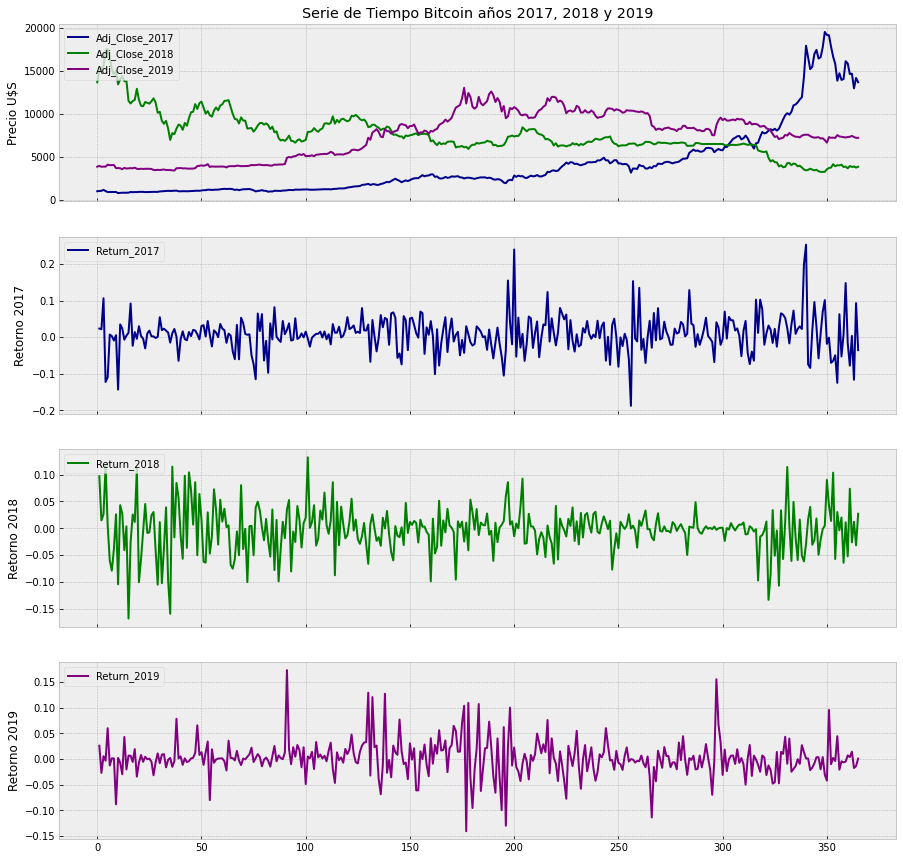

In [35]:
plot.style.use('bmh')
fix, ax = plot.subplots(4,1, figsize=(15,15), sharex=True)

BITCOIN2017.Adj_Close_2017.plot(ax=ax[0], color=['darkblue'])
ax[0].set(title='Serie de Tiempo Bitcoin años 2017, 2018 y 2019', ylabel='Precio U$S')
BITCOIN2018.Adj_Close_2018.plot(ax=ax[0], color=['green'])
BITCOIN2019.Adj_Close_2019.plot(ax=ax[0], color=['purple'])
ax[0].legend(loc='upper left')
BITCOIN2017.Return_2017.plot(ax=ax[1], color=['darkblue'])
ax[1].set(ylabel='Retorno 2017')
ax[1].legend(loc='upper left')
BITCOIN2018.Return_2018.plot(ax=ax[2], color=['green'])
ax[2].set(ylabel='Retorno 2018')
ax[2].legend(loc='upper left')
BITCOIN2019.Return_2019.plot(ax=ax[3], color=['purple'])
ax[3].set(ylabel='Retorno 2019')
ax[3].legend(loc='upper left')

## Histograma y Q-Q Plot

Text(0.5, 1.0, 'Q-Q plot Precio de Cierre Adjustado')

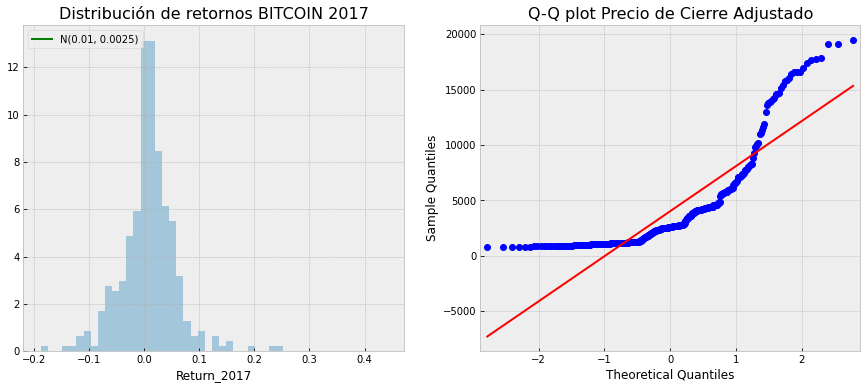

In [36]:
plot.style.use('bmh')
fig, ax = plot.subplots(1, 2, figsize=(15, 6))

# Histograma 2017
sns.distplot(BITCOIN2017.Return_2017, kde=False, norm_hist=True, ax=ax[0]) 
ax[0].set_title('Distribución de retornos BITCOIN 2017', fontsize=16) 
ax[0].plot(rango2017, norm_pdf2017, 'g', lw=2, label=f'N({media2017:.2f}, {desviacion2017**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot 2017
qq = sm.qqplot(BITCOIN2017.Adj_Close_2017.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot Precio de Cierre Adjustado', fontsize = 16)

Text(0.5, 1.0, 'Q-Q plot Precio de Cierre Adjustado')

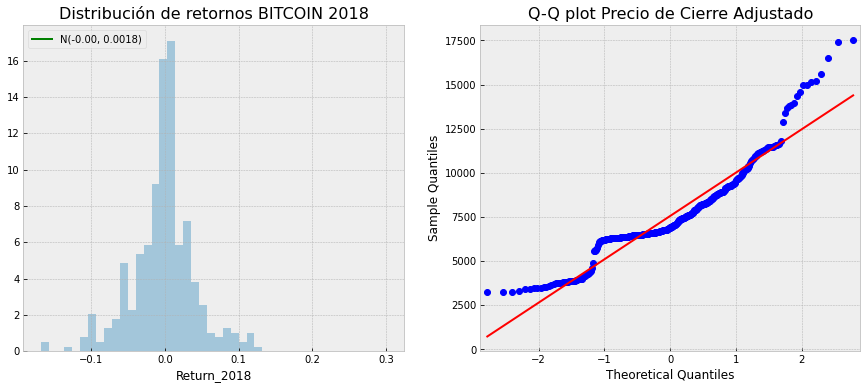

In [37]:
plot.style.use('bmh')
fig, ax = plot.subplots(1, 2, figsize=(15, 6))

# Histograma 2018
sns.distplot(BITCOIN2018.Return_2018, kde=False, norm_hist=True, ax=ax[0]) 
ax[0].set_title('Distribución de retornos BITCOIN 2018', fontsize=16) 
ax[0].plot(rango2018, norm_pdf2018, 'g', lw=2, label=f'N({media2018:.2f}, {desviacion2018**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot 2018
qq = sm.qqplot(BITCOIN2018.Adj_Close_2018.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot Precio de Cierre Adjustado', fontsize = 16)

Text(0.5, 1.0, 'Q-Q plot Precio de Cierre Adjustado')

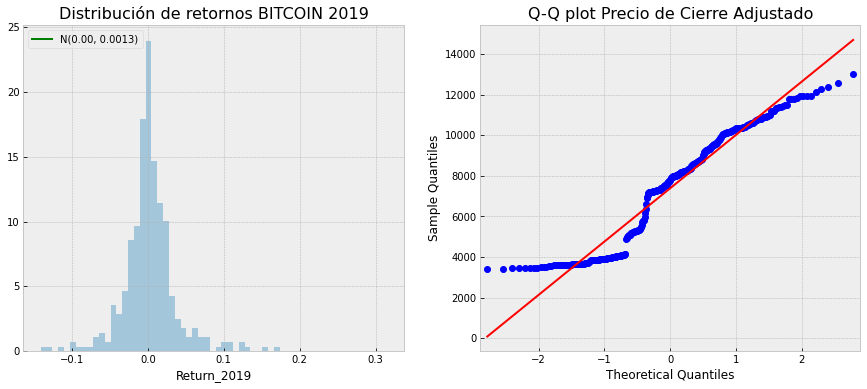

In [38]:
plot.style.use('bmh')
fig, ax = plot.subplots(1, 2, figsize=(15, 6))

# Histograma 2019
sns.distplot(BITCOIN2019.Return_2019, kde=False, norm_hist=True, ax=ax[0]) 
ax[0].set_title('Distribución de retornos BITCOIN 2019', fontsize=16) 
ax[0].plot(rango2019, norm_pdf2019, 'g', lw=2, label=f'N({media2019:.2f}, {desviacion2019**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot 2019
qq = sm.qqplot(BITCOIN2019.Adj_Close_2019.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot Precio de Cierre Adjustado', fontsize = 16)

# Simulación Monte Carlo

In [39]:
pip install yfinance

In [0]:
import statsmodels.api as sm
import yfinance as yf

In [0]:
RISKY_ASSET = 'BTC-USD'
START_DATE_2017 = '2017-01-01'
END_DATE_2017 = '2017-12-31'
START_DATE_2018 = '2018-01-01'
END_DATE_2018 = '2018-12-31'
START_DATE_2019 = '2019-01-01'
END_DATE_2019 = '2019-12-31'

## Series temporales 2017, 2018 y 2019

In [42]:
df2017 = yf.download(RISKY_ASSET, start=START_DATE_2017, end=END_DATE_2017, adjusted=True)
df2018 = yf.download(RISKY_ASSET, start=START_DATE_2018, end=END_DATE_2018, adjusted=True)
df2019 = yf.download(RISKY_ASSET, start=START_DATE_2019, end=END_DATE_2019, adjusted=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [0]:
df2017.rename(columns={'Adj Close':'Adj_Close_2017'}, inplace=True)
df2018.rename(columns={'Adj Close':'Adj_Close_2018'}, inplace=True)
df2019.rename(columns={'Adj Close':'Adj_Close_2019'}, inplace=True)


Average return 2017: 0.85%
Average return 2018: -0.26%
Average return 2019: 0.23%


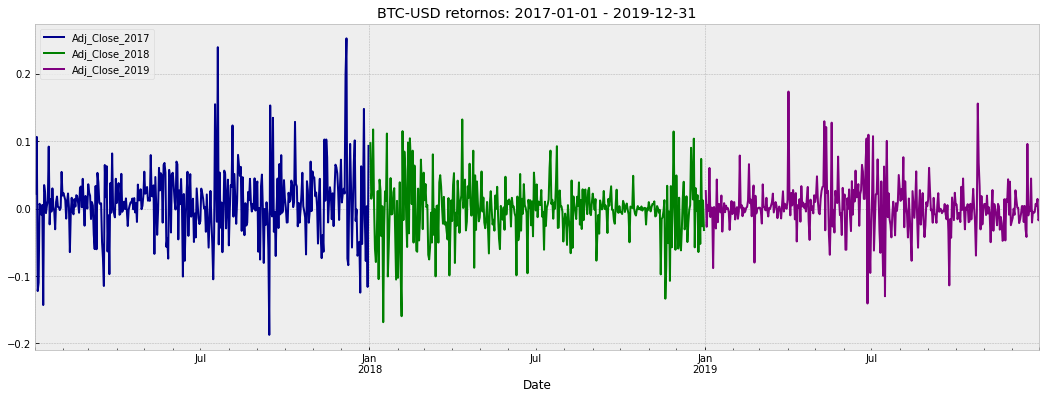

In [44]:
adj_close_2017 = df2017['Adj_Close_2017']
adj_close_2018 = df2018['Adj_Close_2018']
adj_close_2019 = df2019['Adj_Close_2019']
returns2017 = adj_close_2017.pct_change().dropna()
returns2018 = adj_close_2018.pct_change().dropna()
returns2019 = adj_close_2019.pct_change().dropna()
print(f'Average return 2017: {100 * returns2017.mean():.2f}%')
print(f'Average return 2018: {100 * returns2018.mean():.2f}%')
print(f'Average return 2019: {100 * returns2019.mean():.2f}%')
returns2017.plot(figsize=[18, 6], color=['darkblue'])
returns2018.plot(figsize=[18, 6], color=['green'])
returns2019.plot(title=f'{RISKY_ASSET} retornos: {START_DATE_2017} - {END_DATE_2019}', figsize=[18, 6], color=['purple']).legend(loc='upper left')

## Simulacion para el ejercicio 2017

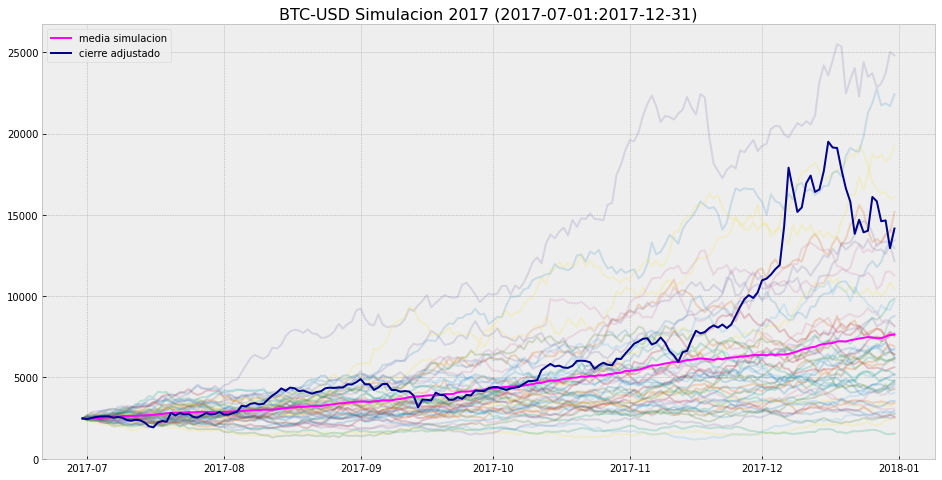

In [45]:
train = returns2017['2017-01-01':'2017-06-30']
test = returns2017['2017-07-01':'2017-12-31']
T = len(test)
N = len(test)
S_0 = adj_close_2017[train.index[-1].date()]
N_SIM = 50
mu = train.mean()
sigma = train.std()
def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)
    return S_t
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)
# Parametros para el gráfico 
LAST_TRAIN_DATE = train.index[-1].date()
FIRST_TEST_DATE = test.index[0].date()
LAST_TEST_DATE = test.index[-1].date()
PLOT_TITLE = (f'{RISKY_ASSET} Simulacion 2017 'f'({FIRST_TEST_DATE}:{LAST_TEST_DATE})')
selected_indices = adj_close_2017[LAST_TRAIN_DATE:LAST_TEST_DATE].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), index=index)

# Grafico
ax = gbm_simulations_df.plot(alpha=0.2, legend=False, figsize=[16, 8])
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), color='fuchsia')
line_2, = ax.plot(index, adj_close_2017[LAST_TRAIN_DATE:LAST_TEST_DATE], color='darkblue')
ax.set_title(PLOT_TITLE, fontsize=16)
ax.legend((line_1, line_2), ('media simulacion', 'cierre adjustado'))

## Simulacion para el ejercicio 2018

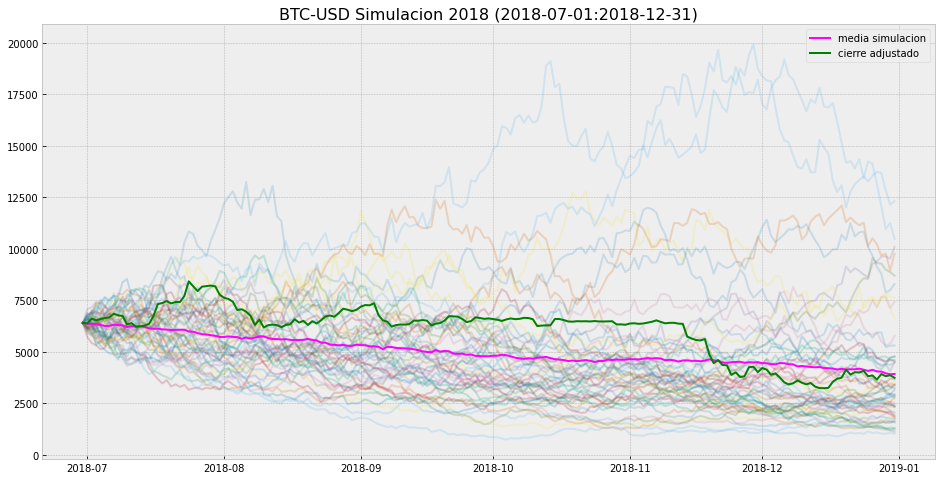

In [46]:
train = returns2018['2018-01-01':'2018-06-30']
test = returns2018['2018-07-01':'2018-12-31']
T = len(test)
N = len(test)
S_0 = adj_close_2018[train.index[-1].date()]
N_SIM = 50
mu = train.mean()
sigma = train.std()
def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)
    return S_t
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)
# Parametros para el gráfico 
LAST_TRAIN_DATE = train.index[-1].date()
FIRST_TEST_DATE = test.index[0].date()
LAST_TEST_DATE = test.index[-1].date()
PLOT_TITLE = (f'{RISKY_ASSET} Simulacion 2018 'f'({FIRST_TEST_DATE}:{LAST_TEST_DATE})')
selected_indices = adj_close_2018[LAST_TRAIN_DATE:LAST_TEST_DATE].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), index=index)

# Grafico
ax = gbm_simulations_df.plot(alpha=0.2, legend=False, figsize=[16, 8])
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), color='fuchsia')
line_2, = ax.plot(index, adj_close_2018[LAST_TRAIN_DATE:LAST_TEST_DATE], color='green')
ax.set_title(PLOT_TITLE, fontsize=16)
ax.legend((line_1, line_2), ('media simulacion', 'cierre adjustado'))

## Simulacion para el ejercicio 2019

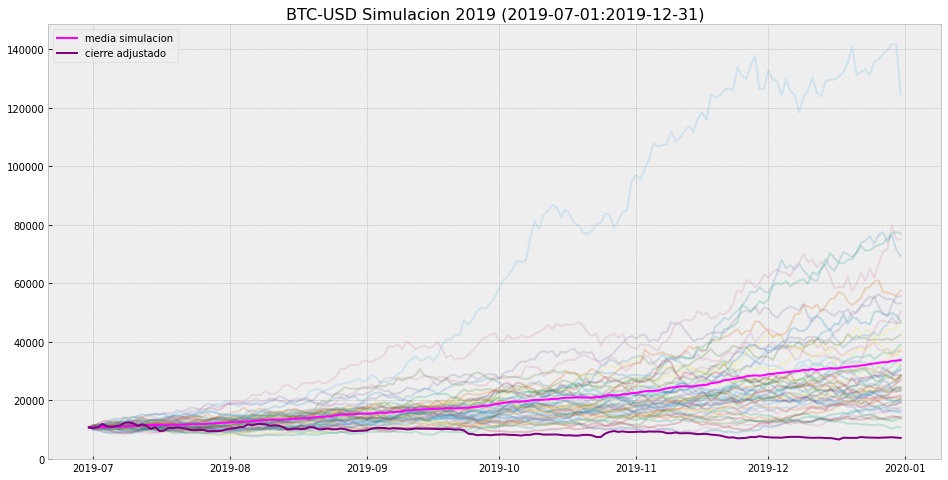

In [47]:
train = returns2019['2019-01-01':'2019-06-30']
test = returns2019['2019-07-01':'2019-12-31']
T = len(test)
N = len(test)
S_0 = adj_close_2019[train.index[-1].date()]
N_SIM = 50
mu = train.mean()
sigma = train.std()
def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)
    return S_t
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)
# Parametros para el gráfico 
LAST_TRAIN_DATE = train.index[-1].date()
FIRST_TEST_DATE = test.index[0].date()
LAST_TEST_DATE = test.index[-1].date()
PLOT_TITLE = (f'{RISKY_ASSET} Simulacion 2019 'f'({FIRST_TEST_DATE}:{LAST_TEST_DATE})')
selected_indices = adj_close_2019[LAST_TRAIN_DATE:LAST_TEST_DATE].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), index=index)

# Grafico
ax = gbm_simulations_df.plot(alpha=0.2, legend=False, figsize=[16, 8])
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), color='fuchsia')
line_2, = ax.plot(index, adj_close_2019[LAST_TRAIN_DATE:LAST_TEST_DATE], color='purple')
ax.set_title(PLOT_TITLE, fontsize=16)
ax.legend((line_1, line_2), ('media simulacion', 'cierre adjustado'))

# Información de los dataframe

In [48]:
BITCOIN2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            366 non-null    datetime64[ns]
 1   High            366 non-null    float64       
 2   Low             366 non-null    float64       
 3   Open            366 non-null    float64       
 4   Close           366 non-null    float64       
 5   Volume          366 non-null    int64         
 6   Adj_Close_2017  366 non-null    float64       
 7   Day             366 non-null    object        
 8   Return_2017     365 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 25.9+ KB


In [49]:
BITCOIN2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            366 non-null    datetime64[ns]
 1   High            366 non-null    float64       
 2   Low             366 non-null    float64       
 3   Open            366 non-null    float64       
 4   Close           366 non-null    float64       
 5   Volume          366 non-null    int64         
 6   Adj_Close_2018  366 non-null    float64       
 7   Day             366 non-null    object        
 8   Return_2018     365 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 25.9+ KB


In [50]:
BITCOIN2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            366 non-null    datetime64[ns]
 1   High            366 non-null    float64       
 2   Low             366 non-null    float64       
 3   Open            366 non-null    float64       
 4   Close           366 non-null    float64       
 5   Volume          366 non-null    int64         
 6   Adj_Close_2019  366 non-null    float64       
 7   Day             366 non-null    object        
 8   Return_2019     365 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 25.9+ KB


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D
plot.rcParams['figure.figsize'] = (16, 9)
plot.style.use('ggplot')

In [52]:
print(BITCOIN2017.groupby('Day').size())

Day
Friday       52
Monday       53
Saturday     52
Sunday       53
Thursday     52
Tuesday      52
Wednesday    52
dtype: int64


In [53]:
print(BITCOIN2018.groupby('Day').size())

Day
Friday       52
Monday       53
Saturday     52
Sunday       52
Thursday     52
Tuesday      53
Wednesday    52
dtype: int64


In [54]:
print(BITCOIN2019.groupby('Day').size())

Day
Friday       52
Monday       52
Saturday     52
Sunday       52
Thursday     52
Tuesday      53
Wednesday    53
dtype: int64


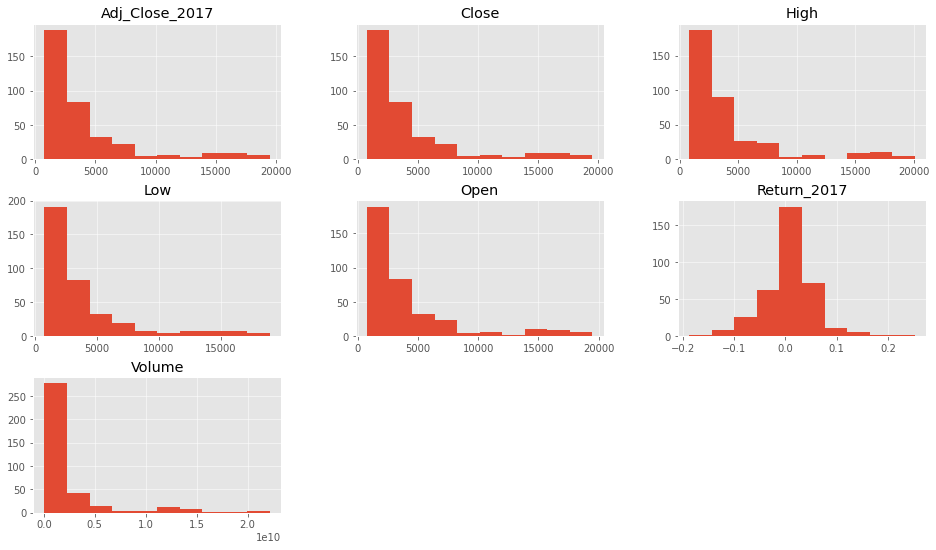

In [55]:
BITCOIN2017.drop(['Day'],1).hist()
plot.show()

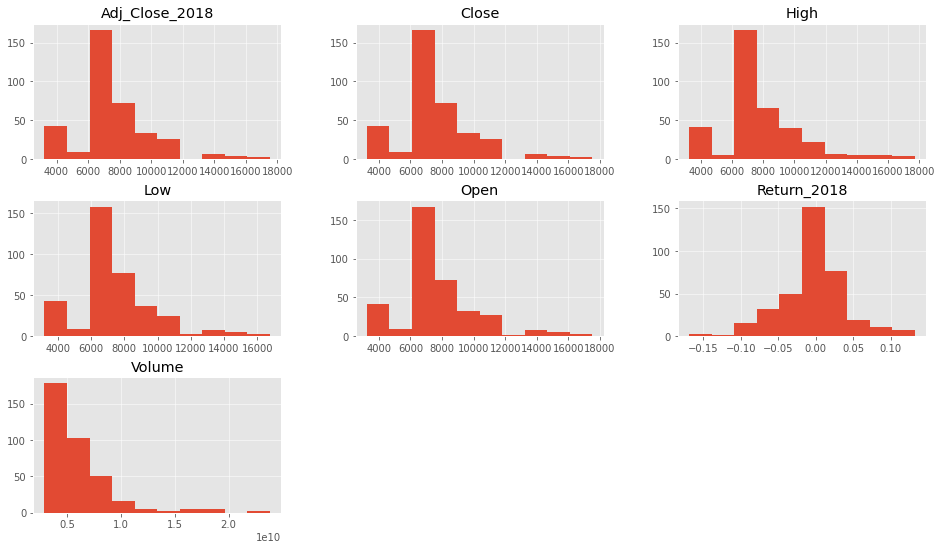

In [56]:
BITCOIN2018.drop(['Day'],1).hist()
plot.show()

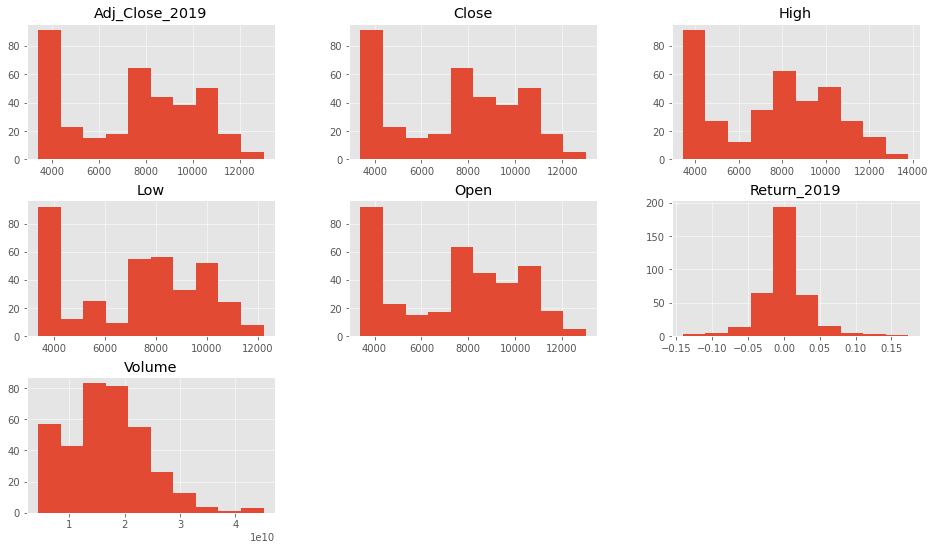

In [57]:
BITCOIN2019.drop(['Day'],1).hist()
plot.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



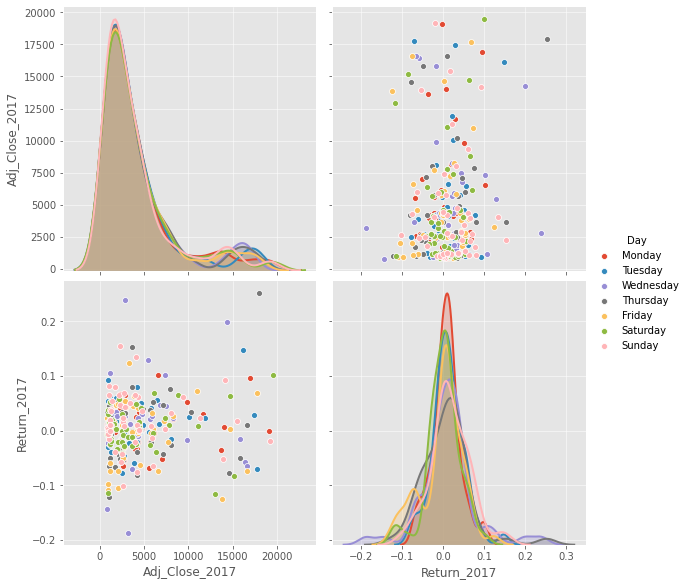

In [58]:
sb.pairplot(BITCOIN2017.dropna(), hue='Day',size=4,vars=["Adj_Close_2017","Return_2017"],kind='scatter')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



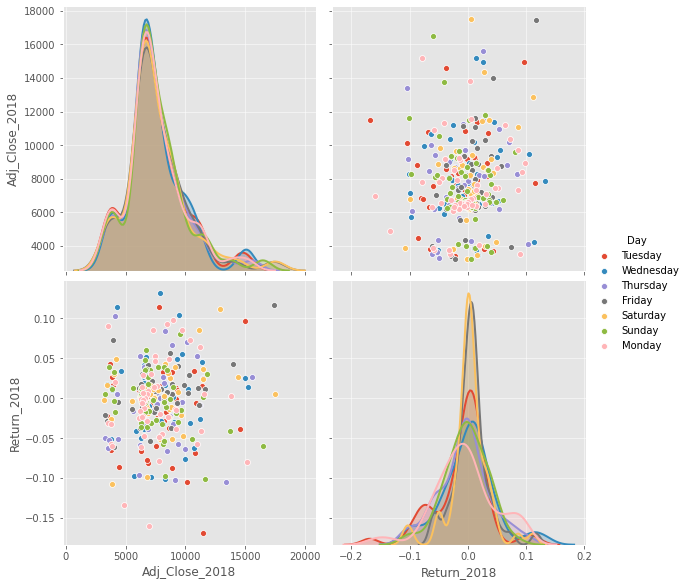

In [59]:
sb.pairplot(BITCOIN2018.dropna(), hue='Day',size=4,vars=["Adj_Close_2018","Return_2018"],kind='scatter')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



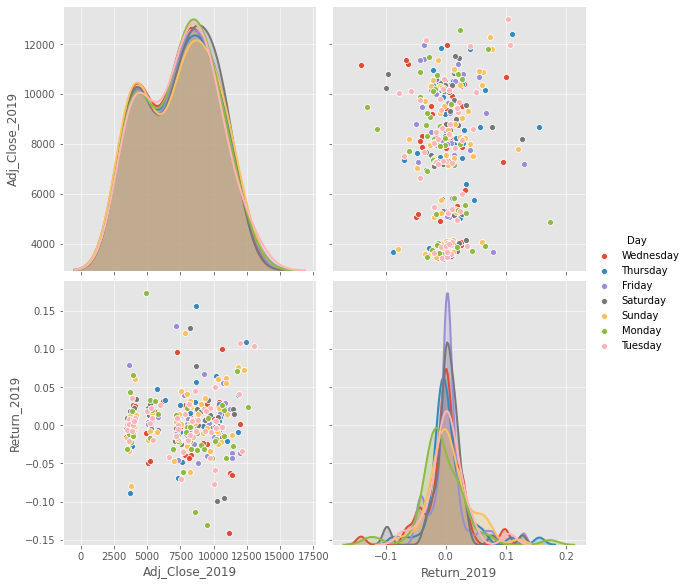

In [60]:
sb.pairplot(BITCOIN2019.dropna(), hue='Day',size=4,vars=["Adj_Close_2019","Return_2019"],kind='scatter')

In [0]:
import plotly.graph_objects as go

In [0]:
Bitcoin_2017_open = np.array(BITCOIN2017['Open']).T 
Bitcoin_2017_close = np.array(BITCOIN2017['Adj_Close_2017']).T
Bitcoin_2018_open = np.array(BITCOIN2018['Open']).T 
Bitcoin_2018_close = np.array(BITCOIN2018['Adj_Close_2018']).T
Bitcoin_2019_open = np.array(BITCOIN2019['Open']).T 
Bitcoin_2019_close = np.array(BITCOIN2019['Adj_Close_2019']).T

In [0]:
movimiento2017 = Bitcoin_2017_close - Bitcoin_2017_open
movimiento2018 = Bitcoin_2018_close - Bitcoin_2018_open
movimiento2019 = Bitcoin_2019_close - Bitcoin_2019_open

In [64]:
df2017W.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2017-01-02 to 2018-01-01
Freq: W-MON
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       53 non-null     float64
 1   High       53 non-null     float64
 2   Low        53 non-null     float64
 3   Close      53 non-null     float64
 4   Adj Close  53 non-null     float64
 5   Volume     53 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 5.4 KB


In [65]:
df2018W.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2018-01-01 to 2018-12-31
Freq: W-MON
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       53 non-null     float64
 1   High       53 non-null     float64
 2   Low        53 non-null     float64
 3   Close      53 non-null     float64
 4   Adj Close  53 non-null     float64
 5   Volume     53 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 5.4 KB


In [66]:
df2019W.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2019-01-07 to 2020-01-06
Freq: W-MON
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       53 non-null     float64
 1   High       53 non-null     float64
 2   Low        53 non-null     float64
 3   Close      53 non-null     float64
 4   Adj Close  53 non-null     float64
 5   Volume     53 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 5.4 KB


In [67]:
fig = go.Figure(data=[go.Candlestick(x=df2017W.index, open=BITCOIN2017.Open, high=BITCOIN2017.High, low=BITCOIN2017.Low, close=BITCOIN2017.Adj_Close_2017)])
fig.show()

In [68]:
fig = go.Figure(data=[go.Candlestick(x=df2018W.index, open=BITCOIN2018.Open, high=BITCOIN2018.High, low=BITCOIN2018.Low, close=BITCOIN2018.Adj_Close_2018)])
fig.show()

In [69]:
fig = go.Figure(data=[go.Candlestick(x=df2019W.index, open=BITCOIN2019.Open, high=BITCOIN2019.High, low=BITCOIN2019.Low, close=BITCOIN2019.Adj_Close_2019)])
fig.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

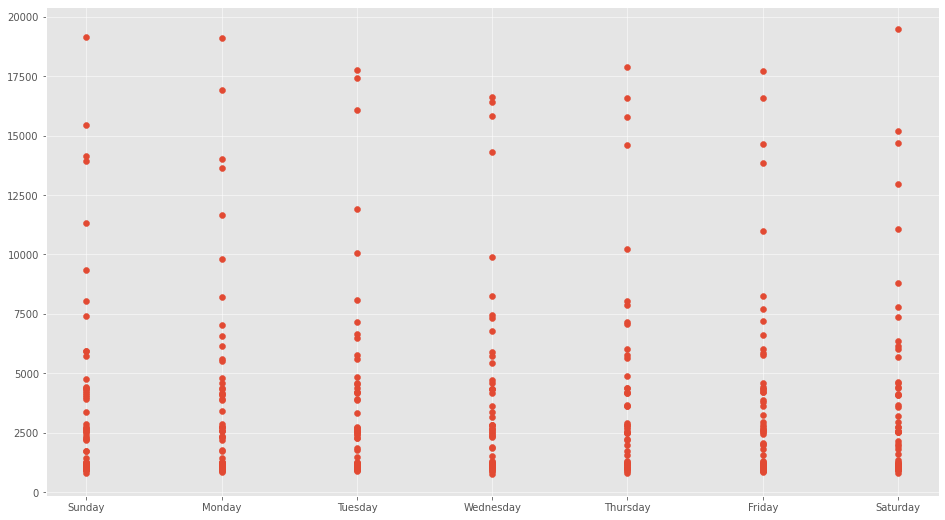

In [78]:
x = BITCOIN2017.Day
y = BITCOIN2017.Adj_Close_2017

plt.scatter(x,y)
plt.show()